In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [3]:
equipos=pd.read_csv('equipo.csv')
partidos= pd.read_csv('partidos.csv')

In [4]:
equipos.head()

,Ajax,ajax.png,Paises Bajos,14
0,Atalanta,atalanta.png,Italia,6
1,Atlético,atletico.png,España,11
2,Barcelona,barcelona.png,España,17
3,Bayern,bayern.png,Alemania,16
4,Benfica,benfica.png,Portugal,15


In [5]:
partidos.head()

,14/09/2021 16:45,29,2,33,34,33.1
0,14/09/2021 16:45,31,19,33,34,33
1,14/09/2021 16:45,25,24,33,34,33
2,14/09/2021 19:00,11,6,33,34,33
3,14/09/2021 19:00,4,5,33,34,33
4,14/09/2021 19:00,16,30,33,34,33


In [6]:
equipos.columns

Index(['Ajax', 'ajax.png', 'Paises Bajos', '14'], dtype='object')

In [7]:
equipos.columns=['Equipo', 'Imagen', 'Pais', 'Indice']
equipos.columns

Index(['Equipo', 'Imagen', 'Pais', 'Indice'], dtype='object')

In [8]:
equipos.head()

,Equipo,Imagen,Pais,Indice
0,Atalanta,atalanta.png,Italia,6
1,Atlético,atletico.png,España,11
2,Barcelona,barcelona.png,España,17
3,Bayern,bayern.png,Alemania,16
4,Benfica,benfica.png,Portugal,15


In [9]:
partidos.columns

Index(['14/09/2021 16:45', '29', '2', '33', '34', '33.1'], dtype='object')

In [10]:
partidos.columns=['Fecha', 'Local', 'Visitante', 'Prob_local', 'Prob_empate', 'Prob_visitante']
partidos.columns

Index(['Fecha', 'Local', 'Visitante', 'Prob_local', 'Prob_empate',
       'Prob_visitante'],
      dtype='object')

In [11]:
partidos.head()

,Fecha,Local,Visitante,Prob_local,Prob_empate,Prob_visitante
0,14/09/2021 16:45,31,19,33,34,33
1,14/09/2021 16:45,25,24,33,34,33
2,14/09/2021 19:00,11,6,33,34,33
3,14/09/2021 19:00,4,5,33,34,33
4,14/09/2021 19:00,16,30,33,34,33


In [12]:
equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Equipo  31 non-null     object
 1   Imagen  31 non-null     object
 2   Pais    31 non-null     object
 3   Indice  31 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [13]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fecha           95 non-null     object
 1   Local           95 non-null     int64 
 2   Visitante       95 non-null     int64 
 3   Prob_local      95 non-null     int64 
 4   Prob_empate     95 non-null     int64 
 5   Prob_visitante  95 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.6+ KB


In [14]:
equipos.describe()

,Indice
count,31.000000
mean,16.096774
std,8.235512
min,1.000000
25%,10.500000
50%,15.000000
75%,22.500000
max,30.000000


In [15]:
partidos.describe()

,Local,Visitante,Prob_local,Prob_empate,Prob_visitante
count,95.000000,95.000000,95.0,95.0,95.0
mean,16.368421,16.652632,33.0,34.0,33.0
std,9.240352,9.208886,0.0,0.0,0.0
min,1.000000,1.000000,33.0,34.0,33.0
25%,8.500000,9.000000,33.0,34.0,33.0
50%,16.000000,17.000000,33.0,34.0,33.0
75%,24.000000,24.500000,33.0,34.0,33.0
max,32.000000,32.000000,33.0,34.0,33.0


In [16]:
equipos.isna().sum()

Equipo    0
Imagen    0
Pais      0
Indice    0
dtype: int64

In [17]:
partidos.isna().sum()

Fecha             0
Local             0
Visitante         0
Prob_local        0
Prob_empate       0
Prob_visitante    0
dtype: int64

<AxesSubplot:>

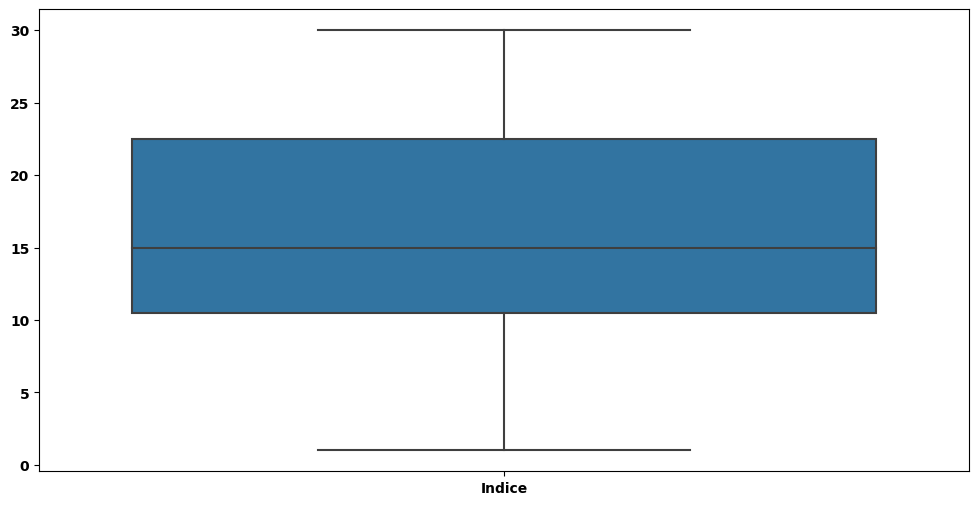

In [19]:
#Distribución de cada variable mediante diagrama de cajas
sns.boxplot(data=equipos, orient='v')

<AxesSubplot:>

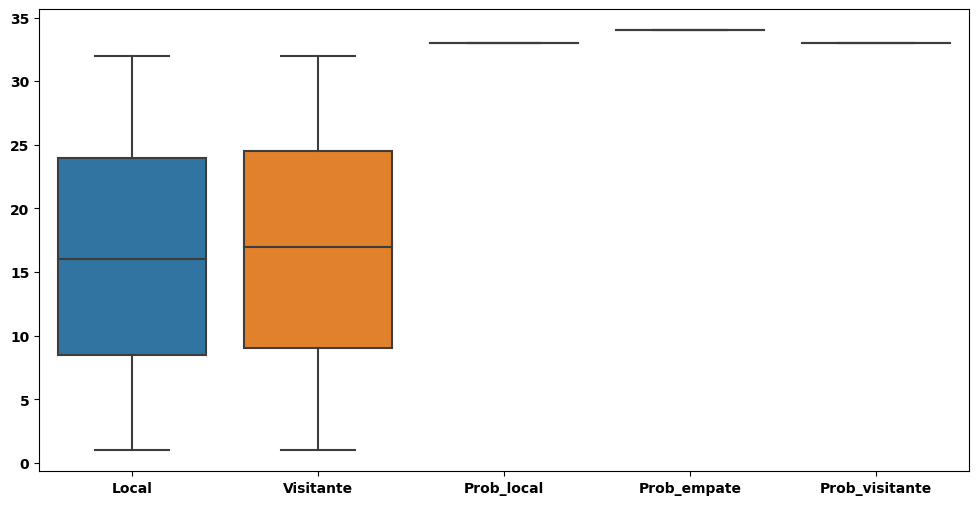

In [20]:
sns.boxplot(data=partidos, orient='v')

<AxesSubplot:ylabel='Count'>

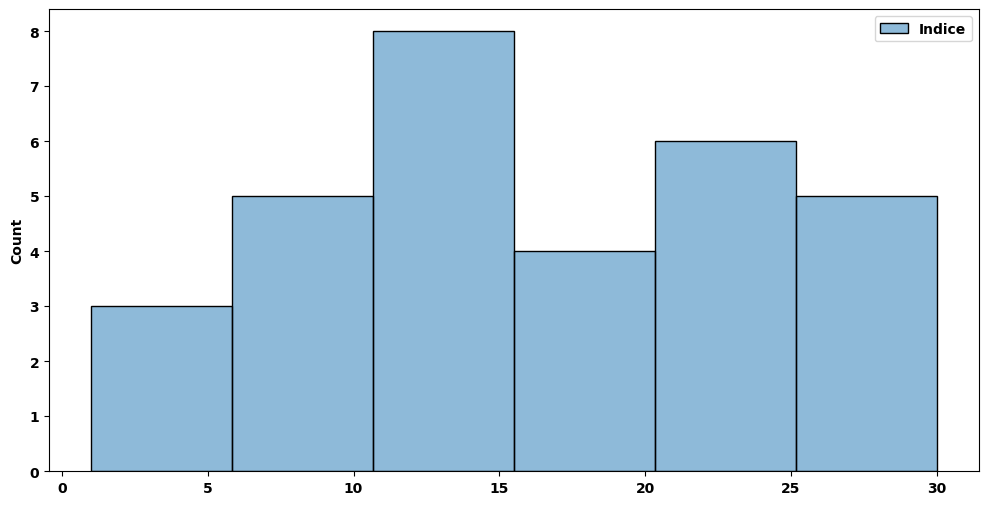

In [23]:
# Visualizamos la distribución de los valores mediante el histograma
sns.histplot(equipos)

<AxesSubplot:ylabel='Count'>

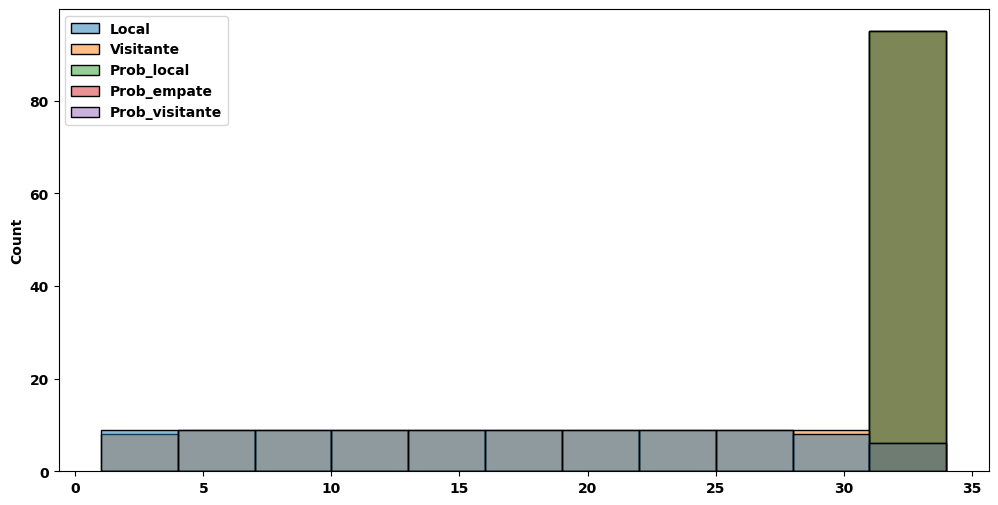

In [24]:
# Visualizamos la distribución de los valores mediante el histograma
sns.histplot(partidos)

In [27]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = equipos['Indice'].quantile(0.25)
Q3 = equipos['Indice'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (equipos['Indice'] < lim_inf) | (equipos['Indice'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_pop_out = equipos[filtro_oulier] 
df_pop_out

,Equipo,Imagen,Pais,Indice


In [29]:
# Calculamos el porcentaje que componen estos valores respecto a la totalidad de los datos
df_pop_out.shape[0]/equipos.shape[0] * 100

0.0

In [39]:
# Consultamos las principales estadísticas de los datos a filtrar
df_pop_out.describe()

,Local,Visitante,Prob_local,Prob_empate,Prob_visitante
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


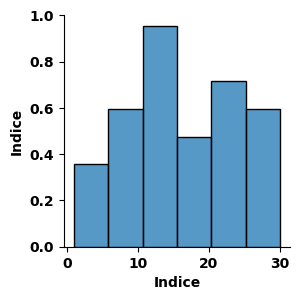

In [40]:
# Visualizamos las relaciones de cada par de variables existentes en el conjunto de datos
sns.pairplot(data=equipos, height=3)
plt.show()

In [41]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = partidos['Local'].quantile(0.25)
Q3 = partidos['Local'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (partidos['Local'] < lim_inf) | (partidos['Local'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_pop_out = partidos[filtro_oulier] 
df_pop_out

,Fecha,Local,Visitante,Prob_local,Prob_empate,Prob_visitante


In [44]:
# Calculamos el porcentaje que componen estos valores respecto a la totalidad de los datos
df_pop_out.shape[0]/partidos.shape[0] * 100

0.0

In [45]:
# Consultamos las principales estadísticas de los datos a filtrar
df_pop_out.describe()

,Local,Visitante,Prob_local,Prob_empate,Prob_visitante
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


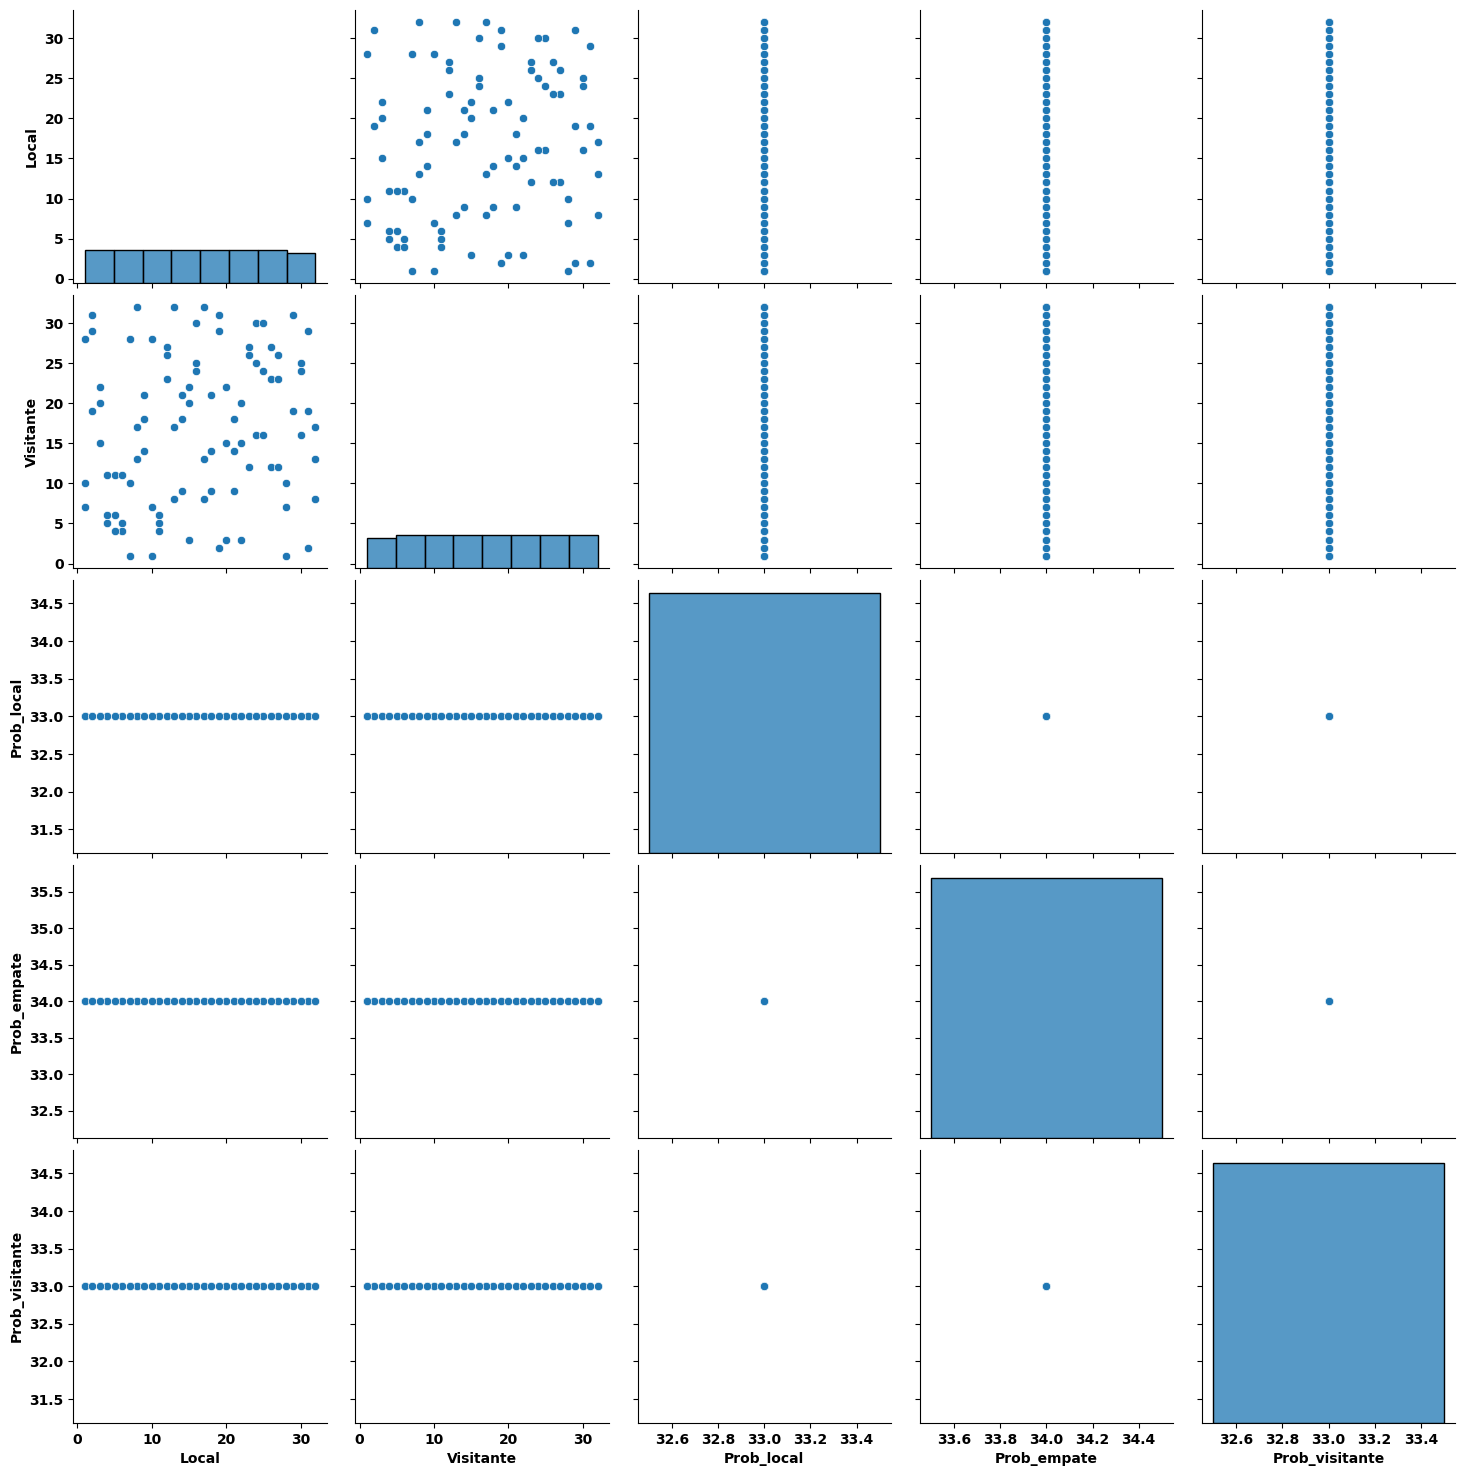

In [47]:
# Visualizamos las relaciones de cada par de variables existentes en el conjunto de datos
sns.pairplot(data=partidos, height=3)
plt.show()

In [48]:
df_corr = equipos.corr()
df_corr

,Indice
Indice,1.0


<AxesSubplot:>

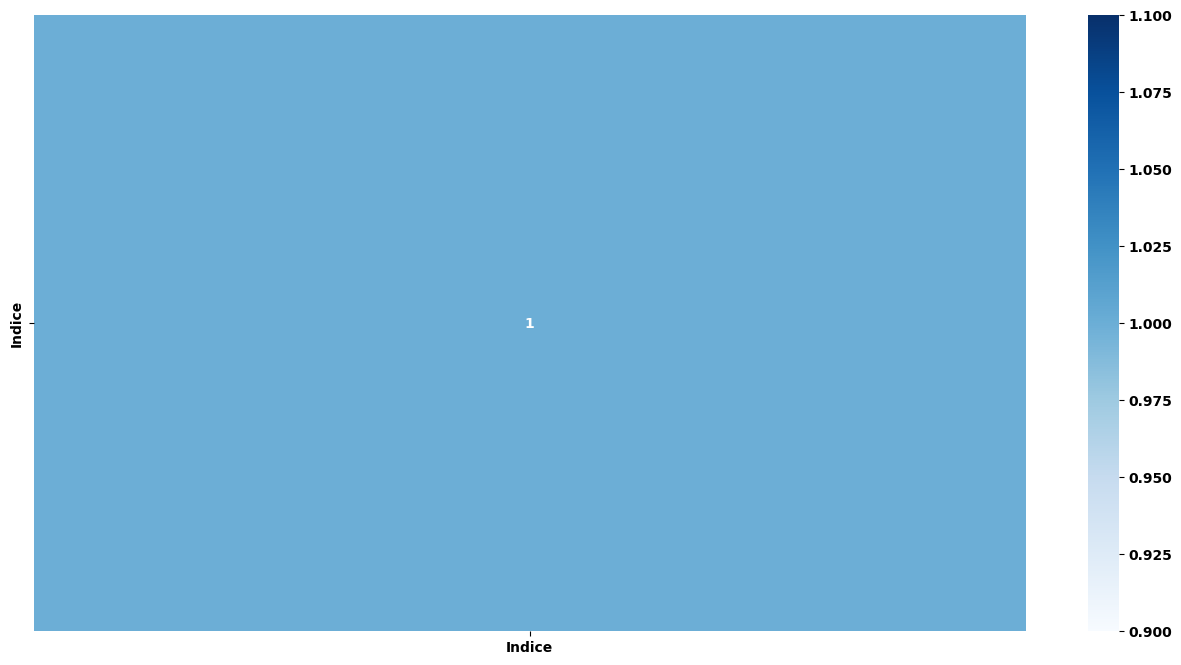

In [49]:
plt.figure(figsize = (16,8))
sns.heatmap(df_corr, cmap='Blues', annot = True)

In [50]:
df_corr = partidos.corr()
df_corr

,Local,Visitante,Prob_local,Prob_empate,Prob_visitante
Local,1.000000,0.134165,NaN,NaN,NaN
Visitante,0.134165,1.000000,NaN,NaN,NaN
Prob_local,NaN,NaN,NaN,NaN,NaN
Prob_empate,NaN,NaN,NaN,NaN,NaN
Prob_visitante,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

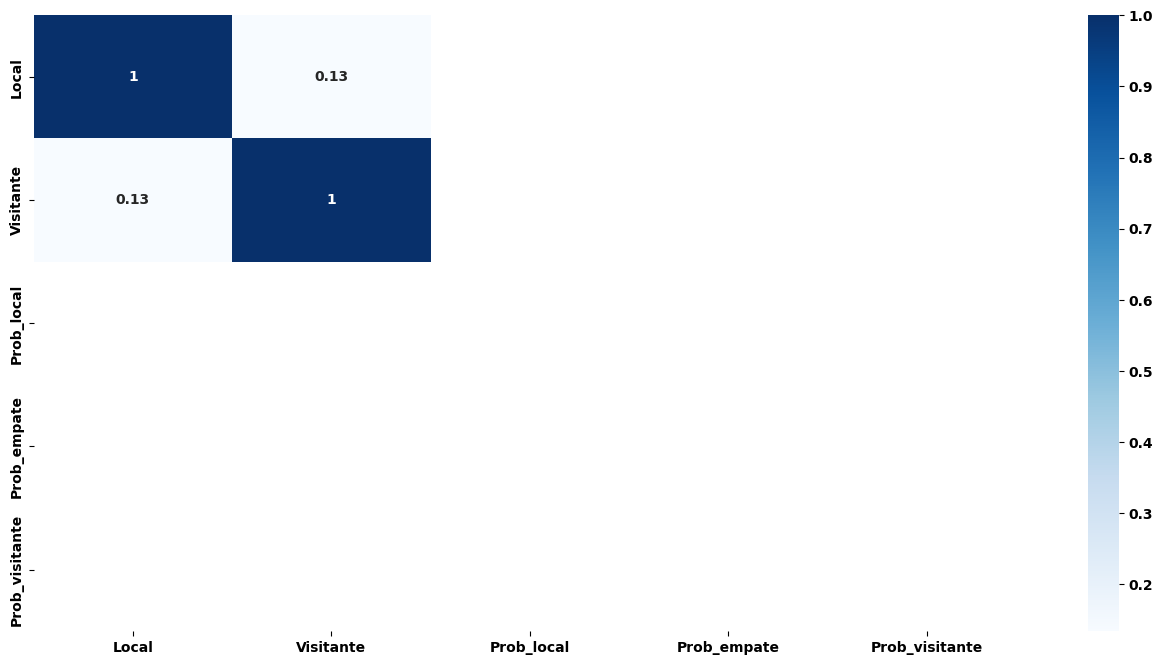

In [51]:
plt.figure(figsize = (16,8))
sns.heatmap(df_corr, cmap='Blues', annot = True)

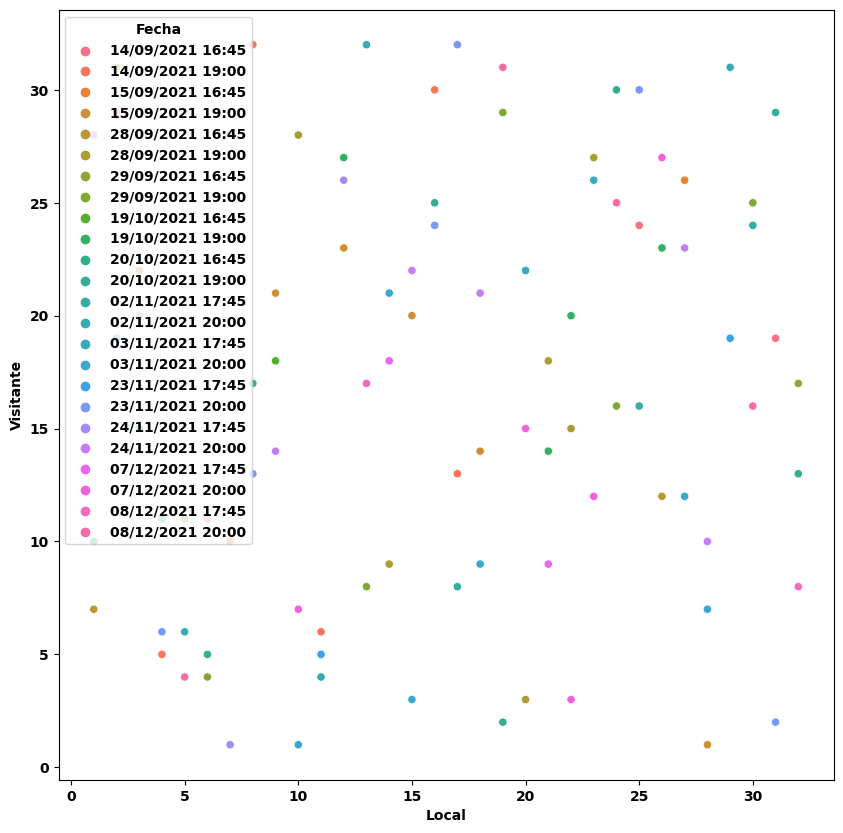

In [54]:
# Diagrama Scatterplot
plt.figure(figsize = (10,10))
sns.scatterplot(x=partidos['Local'], y=partidos['Visitante'], hue=partidos['Fecha'])
plt.show()

CREACIÓN DE MODELOS

In [70]:
# Definimos los conjuntos de variables de entrada y la variable de salida
X_multiple = equipos.drop(['Indice'], axis='columns')
y_multiple = equipos['Indice']

In [71]:
# Dividir el dataset en Training y Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=222)

In [72]:
X_multiple

,Equipo,Imagen,Pais
0,Atalanta,atalanta.png,Italia
1,Atlético,atletico.png,España
2,Barcelona,barcelona.png,España
3,Bayern,bayern.png,Alemania
4,Benfica,benfica.png,Portugal
5,Besiktas,besiktas.png,Turquía
6,Chelsea,chelsea.png,Inglaterra
7,Club Brugge,club_brugge.png,Bélgica
8,Dortmund,dortmund.png,Alemania
9,Dynamo Kyiv,dynamo_kyiv.png,Ucrania


In [73]:
y_multiple

0      6
1     11
2     17
3     16
4     15
5      2
6      1
7     26
8     27
9     28
10    29
11     9
12     8
13    24
14    23
15    22
16    21
17    20
18    19
19    14
20    13
21    12
22    11
23    10
24    14
25    22
26    25
27    30
28     4
29     7
30    13
Name: Indice, dtype: int64

In [74]:
from sklearn.linear_model import LinearRegression
mod_lin_reg= LinearRegression() 
mod_lin_reg.fit(X_train,y_train)
mod_lr_predict=mod_lin_reg.predict(X_test)

ValueError: could not convert string to float: 'Wolfsburg'

In [75]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(mod_lin_reg.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(mod_lin_reg.intercept_)



df_coef = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef['coeficientes'] = mod_lin_reg.coef_

sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'])
plt.show()

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":


AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test,mod_lr_predict))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, mod_lr_predict)*100)
print('Mean Squared Error:', mean_squared_error(y_test, mod_lr_predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, mod_lr_predict)))
print('R^2 coefficient of determination:', r2_score(y_test, mod_lr_predict))